In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Download dataset
mnist = tf.keras.datasets.mnist

#load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize
x_train, x_test = x_train/ 255.0, x_test / 255.0

In [4]:
# Define, train and evalue a linear model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)), # images are 28 x 28 in size
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 5)
model.evaluate(x_test,y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4673 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.9264


[0.26522326469421387, 0.9264000058174133]

In [5]:
# 1A Plot loss and accuracy

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# TODO Create a history object to store the results of model.fit

history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =10)



Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4695 - accuracy: 0.8771 - val_loss: 0.3072 - val_accuracy: 0.9155
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9150 - val_loss: 0.2792 - val_accuracy: 0.9227
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9203 - val_loss: 0.2783 - val_accuracy: 0.9228
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9237 - val_loss: 0.2695 - val_accuracy: 0.9252
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9260 - val_loss: 0.2660 - val_accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2619 - accuracy: 0.9278 - val_loss: 0.2667 - val_accuracy: 0.9264
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2588 - accuracy: 0.9283 - val_loss: 0.2667 - val_accuracy:

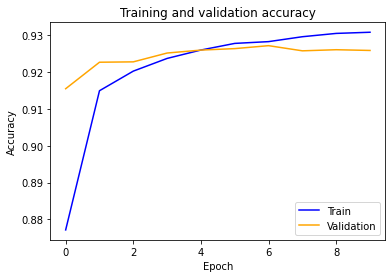

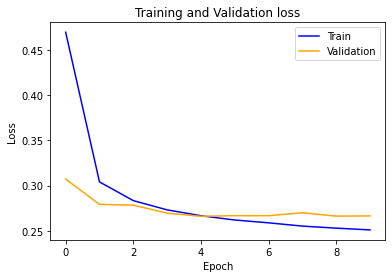

In [7]:
# plot history
def plot(history):

  # The history object contains results on the training and validation sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()


  _= plt.figure()
  plt.title('Training and Validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label="Validation")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


plot(history)


In [8]:
#1B Implement NN

# Single hidden layer
# Add a dense layer with 128 units and Relu Activation
# Train and evaluate
# How does the accuracy compare to the linear model above?

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2601 - accuracy: 0.9253 - val_loss: 0.1311 - val_accuracy: 0.9614
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1155 - accuracy: 0.9657 - val_loss: 0.1028 - val_accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0789 - accuracy: 0.9764 - val_loss: 0.0847 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0942 - val_accuracy: 0.9686
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0746 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0702 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0736 - val_accuracy:

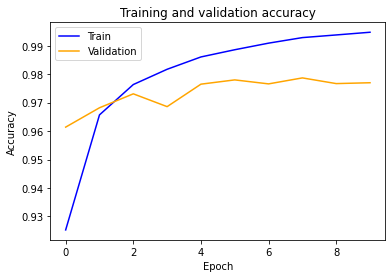

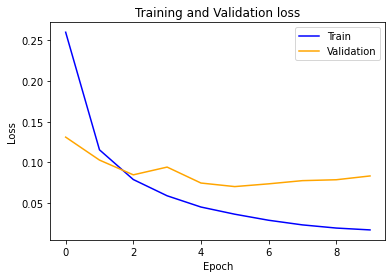

In [9]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

neural_history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =10)
plot(neural_history)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2346 - accuracy: 0.9291 - val_loss: 0.1157 - val_accuracy: 0.9630
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1056 - accuracy: 0.9682 - val_loss: 0.0970 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0770 - accuracy: 0.9761 - val_loss: 0.0999 - val_accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.0871 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9831 - val_loss: 0.0929 - val_accuracy: 0.9738
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0815 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0810 - val_accuracy:

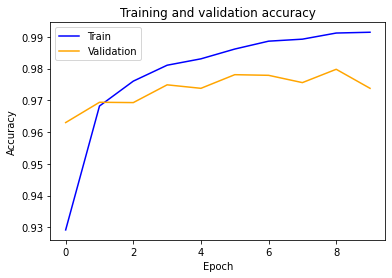

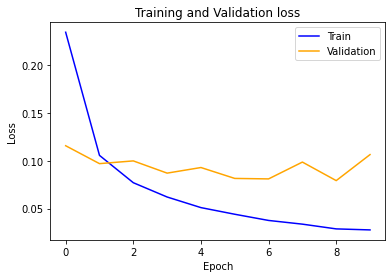

In [10]:
#1C Implement a deep NN
# Modify the code below to create and train a deep neural network with at least two hidden layers

model = tf.keras.models.Sequential([
                                     tf.keras.layers.Flatten(input_shape=(28,28)),
                                     tf.keras.layers.Dense(128,activation='relu'),
                                     tf.keras.layers.Dense(128,activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
deep_history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)
plot(deep_history)

In [11]:
# 1D make predictions on the entire test set using model.predict
# identify one image classified correctly, and one image classified incorrectly
# Display the images, correct labels, predicted labels, and confidence scores

In [12]:
predictions = model.predict(x_test)

In [13]:
# Check the first ten predicted labels and true labels to find examples of correct and incorrect predictions

# Create lists for all correct and incorrect positions
correct_prediction_indicies = []
incorrect_prediction_indicies = []

for i in range(len(predictions)):
  if (tf.math.argmax(predictions[i]) == y_test[i]): # Prediction is correct
    correct_prediction_indicies.append(i)
  else:
    incorrect_prediction_indicies.append(i)
    

In [14]:
print(f'The first correct prediction occurs at index={correct_prediction_indicies[0]}')
print(f'The first incorrect prediction occurs at index={incorrect_prediction_indicies[0]}')

The first correct prediction occurs at index=0
The first incorrect prediction occurs at index=7


In [15]:
# So we can assign variables to avoid typing the full list for clarity
first_correct_pred_index = correct_prediction_indicies[0]
first_incorrect_pred_index = incorrect_prediction_indicies[0]


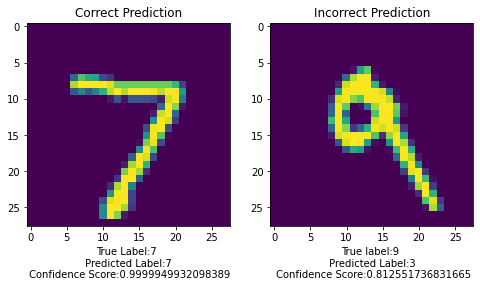

In [16]:
# Unclear about confidence score

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,4)

ax[0].set_title("Correct Prediction")
ax[0].set_xlabel(f'True Label:{y_test[first_correct_pred_index]} \n Predicted Label:{np.argmax(predictions[first_correct_pred_index])} \n Confidence Score:{np.max(predictions[first_correct_pred_index])}')

ax[1].set_title("Incorrect Prediction")
ax[1].set_xlabel(f'True label:{y_test[first_incorrect_pred_index]} \n Predicted Label:{np.argmax(predictions[first_incorrect_pred_index])} \n Confidence Score:{np.max(predictions[first_incorrect_pred_index])}')

ax[0].imshow(x_test[first_correct_pred_index])
ax[1].imshow(x_test[first_incorrect_pred_index])





In [17]:
#Part 2 Subclassed Models
# Instead of using the built in model.fit methods, we will train models using GradientTape and the Keras Subclassing API


In [18]:
#download and prepare our dataset
# We also are going to use tf.data to batch and shuffle the data. 

# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train.astype('float32') / 255, y_train)).shuffle(1024).batch(32)

test_ds= tf.data.Dataset.from_tensor_slices(
    (x_test.astype('float32') / 255, y_test)).batch(32)
    

tf.Tensor(1, shape=(), dtype=uint8)


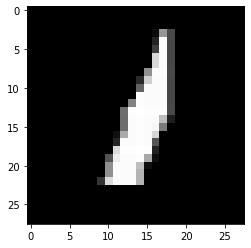

In [19]:
# Example of iterating over a dataset object
for image, label in train_ds.take(1):
  plt.imshow(image[0],plt.get_cmap('gray'))
  print(label[0])

In [20]:
class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax', name="dense1")

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [21]:
model = MyLinearModel()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD()

# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)

      # Calculate loss
      loss = loss_fn(labels, predictions)

    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Calculate loss on the test data
  test_loss = []
  for images, labels in test_ds: 
    predictions = model(images)
    loss_on_batch = loss_fn(labels, predictions)
    test_loss.append(loss_on_batch)
    
  print("Epoch {}, Test loss: {}".format(epoch, tf.reduce_mean(test_loss)))

Epoch 0, Test loss: 0.48074477910995483
Epoch 1, Test loss: 0.4006522297859192
Epoch 2, Test loss: 0.3678535223007202
Epoch 3, Test loss: 0.34874895215034485
Epoch 4, Test loss: 0.3363623023033142


In [22]:
# There are two ways to retrieve the weights. You can use the public API
# (model.get_layer(name).get_weights()), or, you can access the dense layer 
# directly (model.dl) then find the accessor method, or again, access the
# variable directly.
# Python tip: try ```dir(model.d1)```

# TODO: modify this code to get the weights
weights, bias = model.get_layer('dense1').get_weights()
print(weights.shape)

(784, 10)


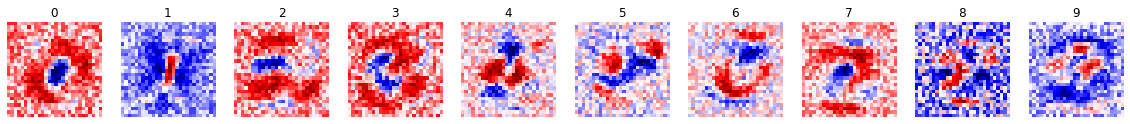

In [23]:
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')
  # TODO: modify this code to complete the plotting function
  i_weights = weights[:,i]
  img = i_weights.reshape(28,28) # Reshape the weights into a 28x28 array
  subplot.imshow(img, plt.get_cmap('seismic'))
plt.show()

In [49]:
# 2B implement Deep neural network

In [50]:
class MyDNN(Model):
  def __init__(self):
    super(MyDNN, self).__init__()
    self.flatten = Flatten()
    # Modify me
    self.d0 = Dense(32, activation='relu')
    self.d1 = Dense(32, activation='relu')
    self.d2 = Dense(256, activation='relu')
    self.d3 = Dense(256, activation='relu')
    self.d4 = Dense(256, activation='relu')
    self.d5 = Dense(256, activation='relu')
    self.d6 = Dense(256, activation='relu')
    self.d7 = Dense(256, activation='relu')
    self.d8 = Dense(256, activation='relu')
    self.d9 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d9(x)

model = MyDNN()

In [51]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [52]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [53]:
# @tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [54]:
# @tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [55]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.46462997794151306, Accuracy: 87.87333679199219, Test Loss: 0.31036651134490967, Test Accuracy: 91.25999450683594
Epoch 2, Loss: 0.3034554123878479, Accuracy: 91.5683364868164, Test Loss: 0.2873935103416443, Test Accuracy: 91.68999481201172
Epoch 3, Loss: 0.2832821309566498, Accuracy: 92.11333465576172, Test Loss: 0.2781335115432739, Test Accuracy: 92.06999969482422
Epoch 4, Loss: 0.2728305160999298, Accuracy: 92.44499969482422, Test Loss: 0.2711184024810791, Test Accuracy: 92.25
Epoch 5, Loss: 0.26630476117134094, Accuracy: 92.66832733154297, Test Loss: 0.27031415700912476, Test Accuracy: 92.18999481201172


In [56]:
# 2C Provide your own implementation of softmax and use it to train a model

In [57]:
# TODO: your code here

def my_softmax(x):  
  # Softmax is the same as: 
  # softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
  softmax_value = tf.exp(x) / tf.reduce_sum(tf.exp(x))
  return softmax_value

class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
  
model = MyModel()

# TODO
# Add code to train this model
# When it's trained, the accuracy should be similar to the linear
# model from part one (but not identical, the weights are initialized randomly)

In [58]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.35472095012664795, Accuracy: 90.09833526611328, Test Loss: 0.2866450250148773, Test Accuracy: 91.94999694824219
Epoch 2, Loss: 0.28675317764282227, Accuracy: 92.02833557128906, Test Loss: 0.27294889092445374, Test Accuracy: 92.22000122070312
Epoch 3, Loss: 0.27222010493278503, Accuracy: 92.36333465576172, Test Loss: 0.2685096263885498, Test Accuracy: 92.4000015258789
Epoch 4, Loss: 0.26401486992836, Accuracy: 92.62166595458984, Test Loss: 0.2625808119773865, Test Accuracy: 92.54000091552734
Epoch 5, Loss: 0.25822243094444275, Accuracy: 92.788330078125, Test Loss: 0.26224467158317566, Test Accuracy: 92.43999481201172
